<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Base de dados & Linguagem SQL
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução ao Google Colab;</li>
  <li>Bases de dados relacionais;</li>
  <li>Introdução ao SQL;</li>
  <li>Introdução ao AWS Console;</li>
  <li>Armazenamento de dados com AWS S3;</li>
  <li>Computação em SQL com AWS Athena.</li>
</ol>

---

# **Instruções**

Neste exercícios, vamos configurar e testar os serviços AWS S3 e AWS Athena da plataforma de computação em nuvem da AWS para utilizarmos durante todo o curso: 

Na etapa de **configuração**, você deve seguir o passo a passo de configuração do ambiente, não há entregáveis.

Na etapa de **atividades**, você deve:

 1. Eexecutar a consulta SQL fornecida;
 2. Exportar os resultados em um arquivo csv para sua máquina; 
 3. Renomear o arquivo como **query_\<numero-da-query>.csv**;
 4. Enviar para a avaliação do tutor na plataforma da EBAC.

> **Atenção**: Substitua o **\<numero-da-query>** numero da consulta, exemplo: **query_1.csv**.

---

# **Configuração**

## 1\. Criando a sua conta da AWS

 Acesse a plataforma da AWS neste [link](https://portal.aws.amazon.com/), clique no botão **Criar uma nova conta da AWS** e siga as etapas para a criação da conta. Com a conta pronta, acesse o console da AWS usando as suas novas credenciais neste [link](https://portal.aws.amazon.com/).


> **Atenção**: Lembre-se que você precisa de um cartão de crédito para criar a sua conta.

## 2\. Configurando o AWS S3

1. Acesse AWS S3;
2. Crie dois buckets:
 *   **ebac-\<seu-nome>-modulo_1**: para os dados;
 *   **ebac-\<seu-nome>-query-results**: para o resultado das consultas do AWS Athena;
3. Faço o upload do arquivo **credito-aula.csv** no bucket de dados.

> **Atenção**: Substitua o **\<seu-nome>** pelo seu primeiro nome, exemplo: **ebac-andreperez-modulo_1**.

> **Atenção**: Caso o bucket já exista, sinta-se a vontade para escolher o nome que desejar.

 > **Atenção**: O arquivo **credito-aula.csv** está na plataforma da EBAC.

## 2\. Configurando o AWS Athena

1. Acesse AWS Athena;
2. Configure o local de armazenamento das consultas:

 * Clique no botão **settings**;
 * Preencha o campo **Query result location** com o nome do bucket (**ebac-\<seu-nome>-query-results**) criado na etapa anterior;
 * Clique em salvar.

# Atividades

## **1 Criação da tabela de clientes** 

No console do AWS Athena, execute a seguinte query:

```sql
CREATE EXTERNAL TABLE clientes(
  id BIGINT, 
  idade BIGINT, 
  sexo STRING, 
  dependentes BIGINT, 
  escolaridade STRING, 
  tipo_cartao STRING, 
  limite_credito DOUBLE, 
  valor_transacoes_12m DOUBLE, 
  qtd_transacoes_12m BIGINT) 
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
WITH SERDEPROPERTIES ('separatorChar' = ',', 'quoteChar' = '"', 'escapeChar' = '\\')
STORED AS TEXTFILE
LOCATION 's3://ebac-<seu-nome>-modulo_1/'
```

No painel de resultados, você deve encontrar o seguinte resultado.

```
Query successful.
```


> **Atenção**: No campo LOCATION, substitua o **\<seu-nome>** pelo seu primeiro nome, exemplo: **ebac-andreperez-modulo_1**.

> **Atenção**: Nesta atividade, você não precisa exportar os resultados.

Minha query de criação da tabela 
```
CREATE EXTERNAL TABLE clientes (
  id BIGINT, 
  idade BIGINT, 
  sexo STRING, 
  dependentes BIGINT, 
  escolaridade STRING, 
  tipo_cartao STRING, 
  limite_credito DOUBLE, 
  valor_transacoes_12m DOUBLE, 
  qtd_transacoes_12m BIGINT) 
ROW FORMAT SERDE 
  'org.apache.hadoop.hive.serde2.OpenCSVSerde' 
WITH SERDEPROPERTIES ( 
  'escapeChar'='\\', 
  'quoteChar'='\"', 
  'separatorChar'=',') 
STORED AS INPUTFORMAT 
  'org.apache.hadoop.mapred.TextInputFormat' 
OUTPUTFORMAT 
  'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'
LOCATION 's3://ebac-ricardo-modulo-1/'

```

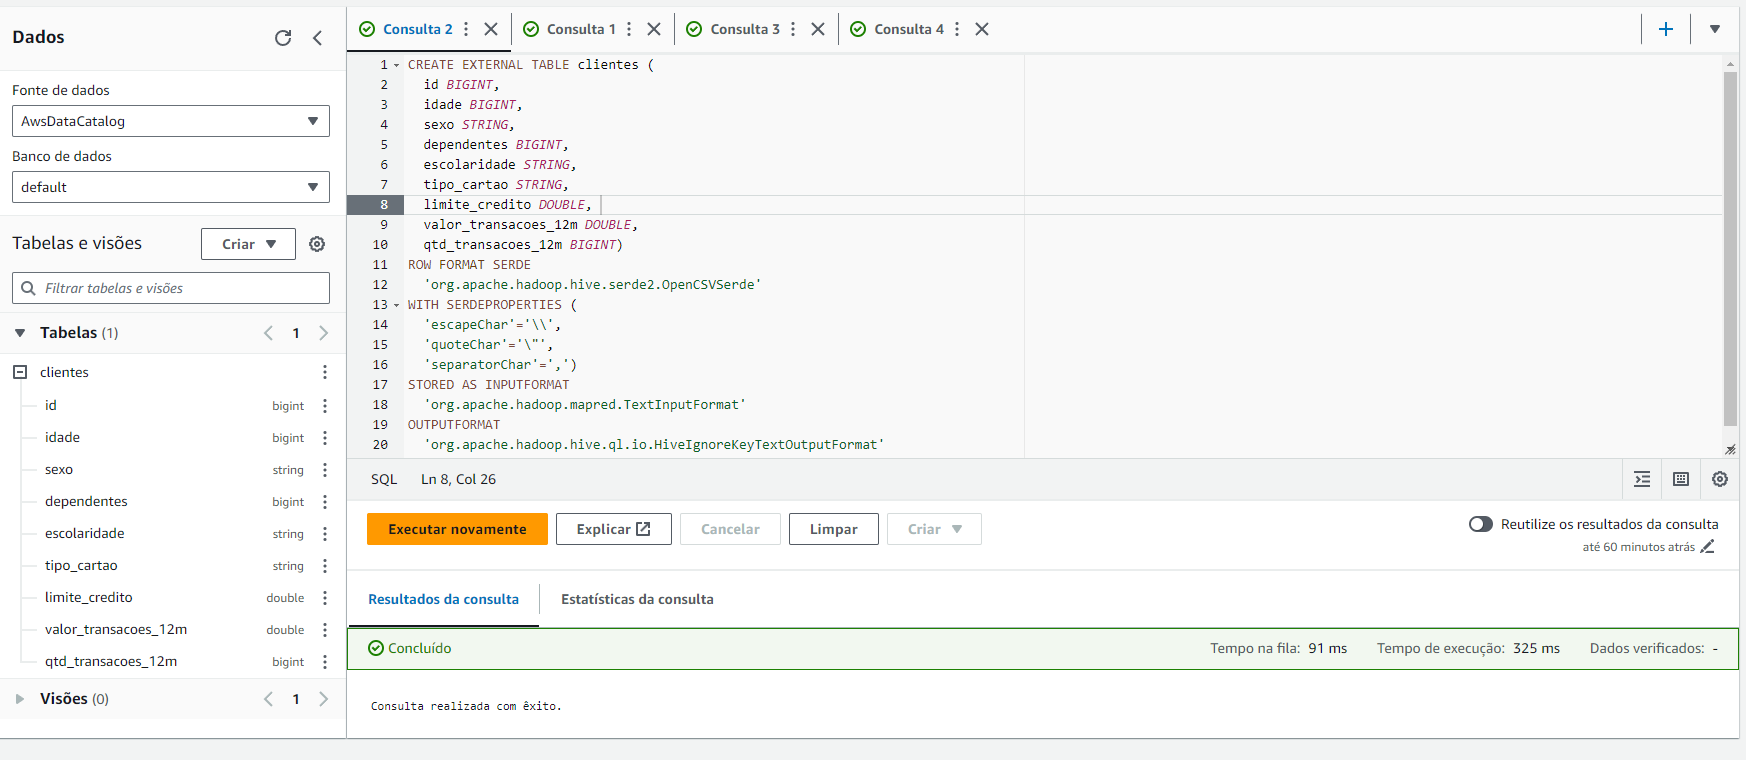

## **2. Explorando os dados da tabela de clientes** 

### **2.1. Query 1** 

No console do AWS Athena, execute a seguinte query:

```sql
SELECT * FROM clientes;
```

No painel de resultados você deve encontrar o seguinte resultado.

| id        | idade | sexo | dependentes | escolaridade | tipo_cartao | limite_credito | valor_transacoes_12m | qtd_transacoes_12m |
|-----------|-------|------|---|--------------|-|----------------|----------|----|
| 768805383 | 45    | M    | 3 | ensino medio | blue | 12.691,51      | 1.144,90 | 42 |
| 818770008 | 49    | F    | 5 | mestrado     | blue | 8.256,96      | 1.291,45 | 33 |
| 713982108 | 51    | M    | 3 | mestrado     | blue | 3.418,56      | 1.887,72 | 20 |

<br>

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

Minha query de seleciona a tabela.
query_1 

select * from clientes ;

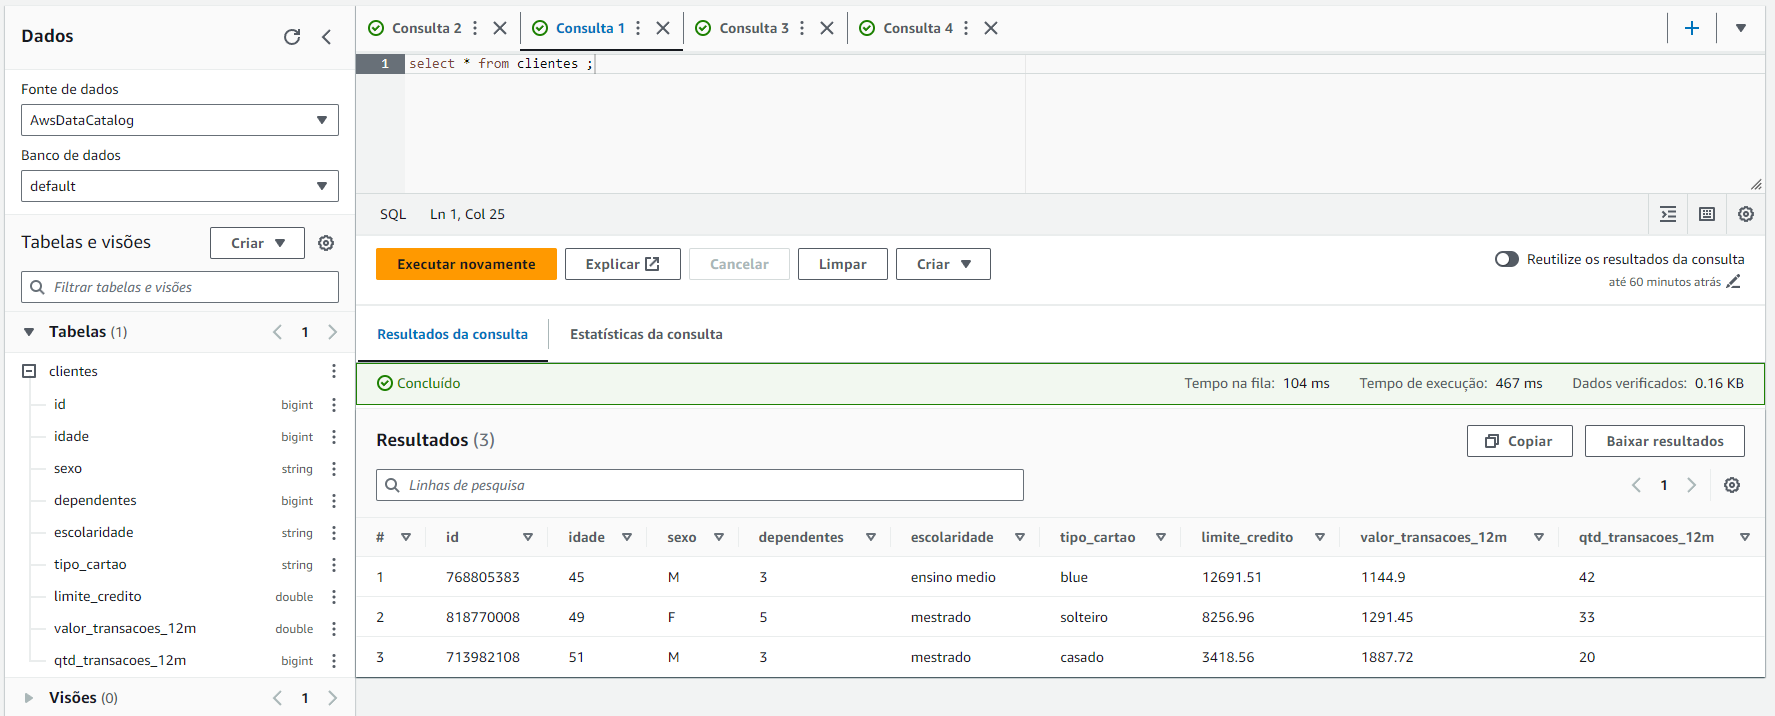

### **2.2. Query 2** 

No console do AWS Athena, execute a seguinte query:

```sql
SELECT id, idade, limite_credito FROM clientes WHERE sexo = 'M' ORDER BY idade DESC;
```

No painel de resultados você deve encontrar o seguinte resultado.

| id        | idade | limite_credito |
|-----------|-------|----------------|
| 713982108 | 51    |   3418.56      |
| 768805383 | 45    |  12691.51      |

<br>

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

Minha query de seleciona o clients do sexo masculinos pela idade ordenados em descendente.
A query_2


select id, idade, limite_credito from clientes where sexo = 'M' order by idade desc

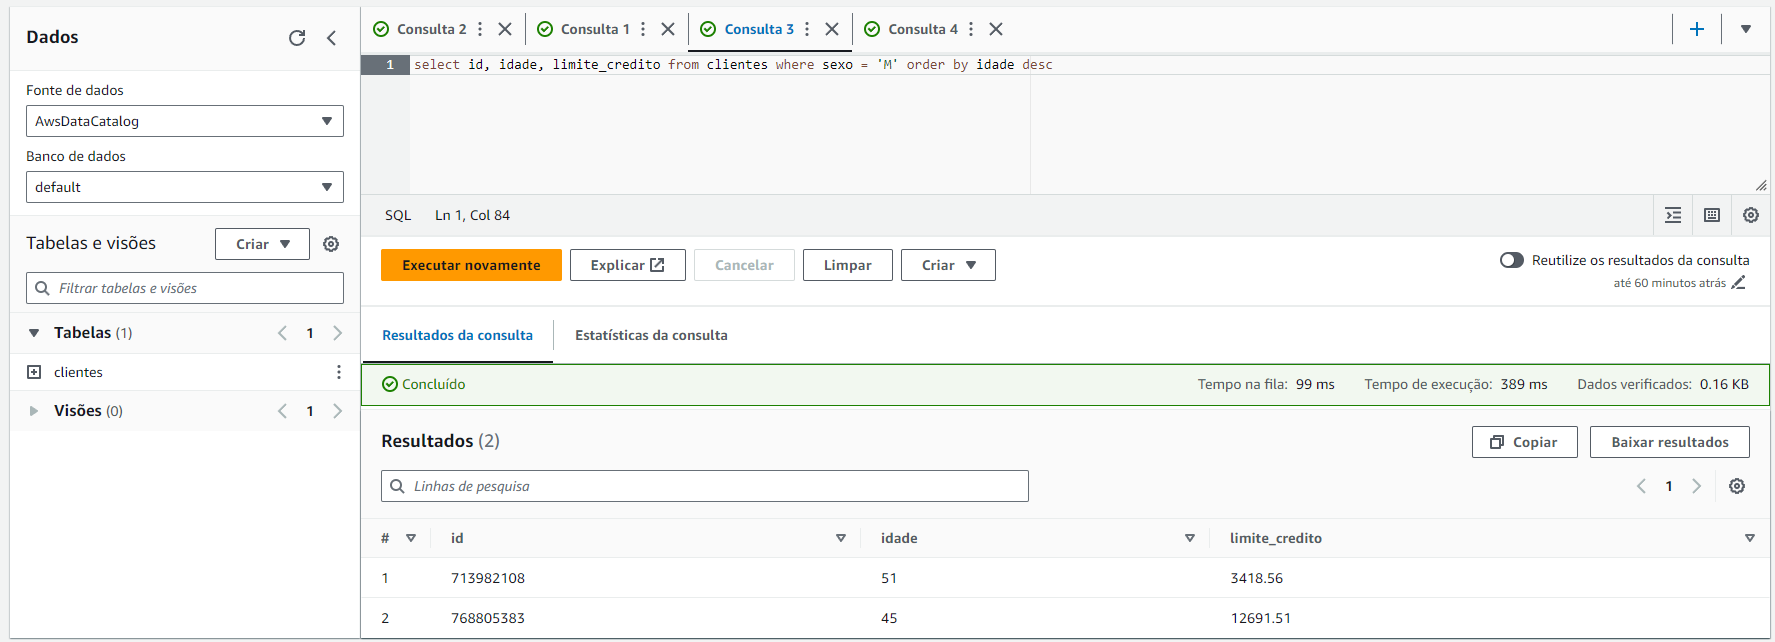

### **2.3. Query 3** 

No console do AWS Athena, execute a seguinte query:

```sql
SELECT sexo, AVG(idade) AS "media_idade_por_sexo" FROM clientes GROUP BY sexo;
```

No painel de resultados você deve encontrar o seguinte resultado.

| sexo | media_idade_por_sexo |
|------|----------------------|
| F    | 49                   |
| M    | 48                   |

<br>

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

Minha query de seleciona A media da idade ordenado por sexo .
A query_3

select sexo, avg(idade) as "media_idade_por_sexo" from clientes group by sexo;

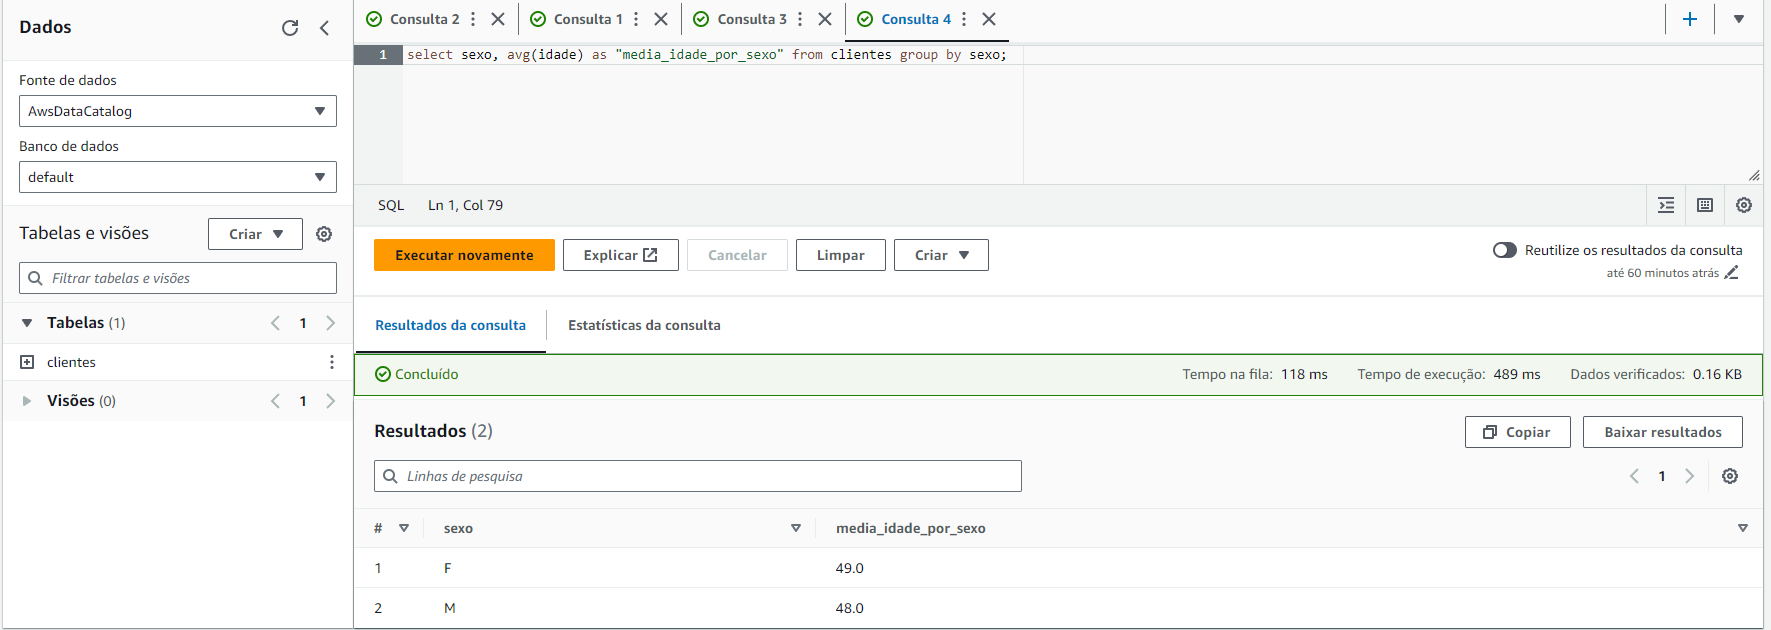